# Assignment 1 (New York Movies Scene)
### Christian Becerra Clavijo
### ID 110351748

# Introduction
### The following statistical study focuses on analyzing two variables which are 'Duration' which represents the time between the issuance of the order until its approval and 'LeadTime' which represents the duration of the recording of the film on the streets of New York. In order to carry out the filming, it is necessary to issue an interest order to the media and entertainment office and wait for its approval. Once the film is approved, recording begins and will have an end date.
### Within the statistical analysis we will observe the average time of duration together with its standard deviation and we will also evaluate within which range of times the duration of the approval of the order is frequent. We will also observe the duration time stratified by Borough and by Category independently, this will give us the possibility to evaluate in which Borough the duration time is higher or lower and which of the categories is the most used for the films. We will delve a little about the police precinct to verify which is the most popular and we will calculate all the corresponding statistics.
### We will also validate the delivery time of the films by Borough and we will observe which of them is the most or the least used. It should be noted that all this statistical analysis will have visualizations attached to help the reader understand a little more about the study.


# Import the CSV file and some libraries

In [139]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Getting the csv field
movies = pd.read_csv("film-permits.csv")
movies.drop(['EventID'], axis=1)
# Print the table
movies.head()

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s)
0,43547,Shooting Permit,2012-01-10T07:00:00,2012-01-10T19:00:00,2012-01-04T12:25:37,"Mayor's Office of Film, Theatre & Broadcasting",EAGLE STREET between FRANKLIN STREET and WEST ...,Brooklyn,"1, 2","108, 94",Television,Episode series,United States of America,"11101, 11222"
1,43997,Theater Load in and Load Outs,2012-01-19T07:00:00,2012-02-20T22:00:00,2012-01-09T18:22:29,"Mayor's Office of Film, Theatre & Broadcasting",WEST 46 STREET between BROADWAY and 8 AVENUE,Manhatan,5,18,Theater,Theater,United States of America,10036
2,43675,Shooting Permit,2012-01-09T07:00:00,2012-01-09T20:00:00,2012-01-05T13:03:51,"Mayor's Office of Film, Theatre & Broadcasting",ALLEN STREET between EAST HOUSTON STREET and R...,Manhatan,3,"5, 7",Still Photography,Not Applicable,United States of America,10002
3,44536,Shooting Permit,2012-01-23T07:00:00,2012-01-23T21:00:00,2012-01-18T12:08:17,"Mayor's Office of Film, Theatre & Broadcasting",WEST 64 STREET between BROADWAY and CENTRAL ...,Manhatan,"4, 7","18, 20",Television,Episode series,United States of America,"10019, 10023"
4,44061,Shooting Permit,2012-01-18T06:00:00,2012-01-18T21:00:00,2012-01-10T14:57:29,"Mayor's Office of Film, Theatre & Broadcasting",INGRAHAM STREET between STEWART AVENUE and GAR...,Brooklyn,1,90,Commercial,Promo,United States of America,11237


# Information about types of variables (Package datetime)

In [140]:
# Chance the variables of date  "StartDateTime" and "EndDateTime"
movies['StartDateTime'] = pd.to_datetime(movies['StartDateTime'],errors='raise')
movies['EndDateTime'] = pd.to_datetime(movies['EndDateTime'],errors='raise')

# Calculation of Duration
movies['Duration'] = (movies.EndDateTime - movies.StartDateTime) / pd.Timedelta('1 hour')

# Stadistical description about variable "Duration"

### We observe that the mean of time of duration of an order approved is 19.74 hours, there is a dispersion of the data regarding the mean for 43.08. On the other hand, the percentiles seem have an equative distribution of the data given that its percentages vary between 13, 15 and 16.50 hours. We found that the minimal value is 0.02 hours and the maximum is 3528 hours. The maximum value of time of duration is found in the position number 23050, in the further investigation it could generate a distort of the histogram so it is necessary to clean the data up a little bit.

In [141]:
# Outlier value from "Duration": Given the high number of parameters there are some values ​​that distort the statistical analysis, in this case we observe one of the atypical variables
outlier_value = np.where(movies['Duration']==3528)

# Compute the interquartile range
q1 = movies['Duration'].quantile(q=0.25)
q3 = movies['Duration'].quantile(q=0.75)
IQR = q3 - q1

print(movies.Duration.describe().round(2),'\n',IQR,'\n',outlier_value)

count    52350.00
mean        19.74
std         43.08
min          0.02
25%         13.00
50%         15.00
75%         16.50
max       3528.00
Name: Duration, dtype: float64 
 3.5 
 (array([23050], dtype=int64),)


# Histogram graph of "Duration"
### After making a histogram of duration's variable is observed a slightly inclination to the left side which means all of data are concentrated (in this case) between 10 to 20. After 20 hours it is found some films, whose duration is short and the bins structured by Jupyter are too many that the graph is extending to the right side make the readable of it so much difficult.

Text(0, 0.5, 'Frecuency')

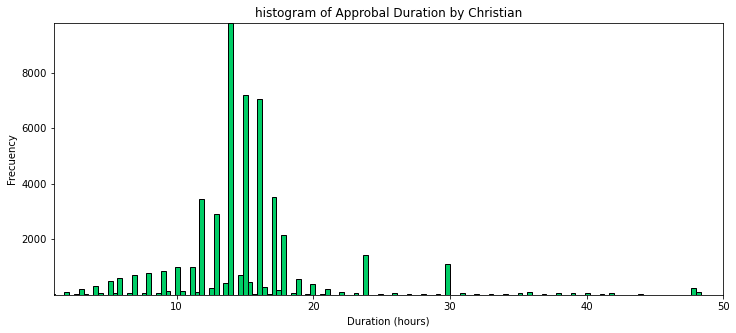

In [142]:
n, bins, patches = plt.hist(movies['Duration'],bins=10000,facecolor='#00CD66',edgecolor='black')
max_y = max(n)

plt.axis([1,50,1,max_y])
plt.title("histogram of Approbal Duration by Christian")
plt.xlabel("Duration (hours)")
plt.ylabel("Frecuency")

# Histogram of Duration variable (Between 10 to 20)
### We observe that there is a distribution of the data a little more readable with a number of bins of 11 and the graph is according to the description of the aforementioned precentiles where the distributions are between the values of 25% for durations of 13 hours, 50 % for durations of 16.50 hours and 75% for durations of 16.50.

[10.01666667 10.92424242 11.83181818 12.73939394 13.6469697  14.55454545
 15.46212121 16.36969697 17.27727273 18.18484848 19.09242424 20.        ]


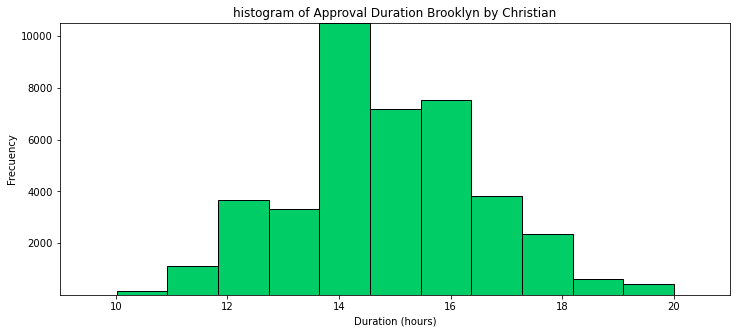

In [143]:
# Create a data frame of duration between a range of hours 10 to 20
Duration_between_10_to_20 = movies[(movies['Duration'] > 10) & (movies['Duration'] <= 20)]
# Eliminate some columns from data frame 'Duration_between_10_to_20'
Duration_between_10_to_20.drop(['EventID','EventType', 'StartDateTime', 'EndDateTime','EnteredOn','EventAgency','ParkingHeld','Borough','CommunityBoard(s)','PolicePrecinct(s)','Category','SubCategoryName','Country','ZipCode(s)'], axis=1)
# Plot a histogram of 'Duration_between_10_to_20'
n, bins, patches = plt.hist(Duration_between_10_to_20['Duration'],bins=11,facecolor='#00CD66',edgecolor='black')
max_y = max(n)
print(bins)
plt.axis([9,21,1,max_y])
plt.title("histogram of Approval Duration Brooklyn by Christian")
plt.xlabel("Duration (hours)")
plt.ylabel("Frecuency")
plt.rcParams['figure.figsize']=[12,5]

### From the following graph we can highlight that 15% of the data indicate a duration of approval less than 14 hours, while 50 of the data indicate a duration of 15 hours, which means that in 75% of the se find the movies that had a duration of 16 hours.

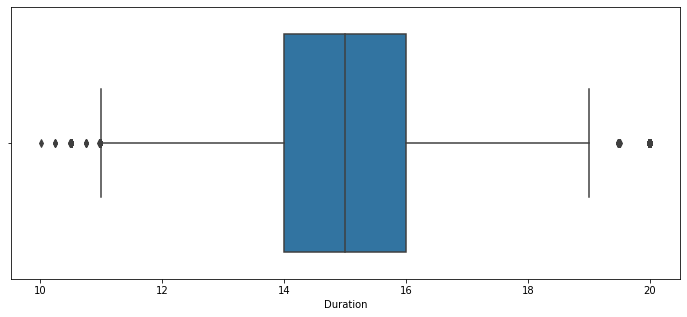

In [144]:
import matplotlib.pyplot as plt
# Plot a boxplot of 'Duration_between_10_to_20'
sns.boxplot(data=Duration_between_10_to_20,x='Duration')
plt.rcParams['figure.figsize']=[12,5]

### The following graph shows how the histogram and the boxplot combine together to draw better conclusions and provide greater understanding to the reader.

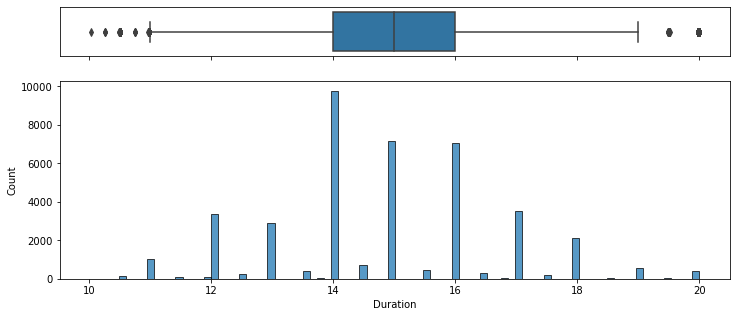

In [145]:
import warnings
warnings.filterwarnings('ignore')
f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.2,.8)})
sns.boxplot(Duration_between_10_to_20['Duration'], ax = ax_box)
sns.histplot(data = Duration_between_10_to_20, x = 'Duration', ax = ax_hist)
ax_box.set(xlabel='',yticks=[])
plt.show()

# Estadistical summary split by Borough 

### The following study will be focused on performing a statistical analysis of the approval duration () stratified by Borough. Initially it is necessary to verify which are the Boroughs that we have to obtain a better understanding. As can be seen, the precentiles of each of the Boroughs vary between 14 and 16 between 25% and 75% respectively. The maximum value corresponds to 'Manhatan' which is 3528 horas and also the minimum corresponds to it with a value of 0.016 horas, the smallest dispersion of the data corresponds to 'Staten island' with a value of 8.57 horas and apparently they vary between 15 and 16 without taking in mind Mnahatan.

In [146]:
# Data Grouping by Borough
grouped_by_Borough_statitics = pd.DataFrame(movies.groupby('Borough').describe())
grouped_by_Borough_statitics.drop(['EventID'], axis=1)

Duration                                                        \
                 count       mean        std       min        25%        50%   
Borough                                                                        
Bronx           1473.0  16.129713  16.258893  2.000000  14.000000  15.000000   
Brooklyn       15887.0  16.257721  18.210767  0.983333  14.000000  14.983333   
Manhatan       26226.0  23.319712  58.315841  0.016667  12.983333  15.000000   
Queens          8104.0  16.006688  13.967648  1.000000  14.000000  15.000000   
Staten Island    660.0  15.336616   8.575744  2.000000  14.000000  15.000000   

                                  
                75%          max  
Borough                           
Bronx          16.0   270.983333  
Brooklyn       16.0   929.000000  
Manhatan       17.0  3528.000000  
Queens         16.0   692.483333  
Staten Island  16.0   197.983333

### The bar graph below shows the length of approval time per Borough in New York City. We can see that in 'Staten Island' the duration was around 15 hours being the shortest time among all the Boroughs, as for the longest time it was 'Manhatan' with a duration around 24 hours. 'Queens', 'Brooklyn' and 'Bronx' remained worth nearly 16 hours.

AxesSubplot(0.125,0.125;0.775x0.755)


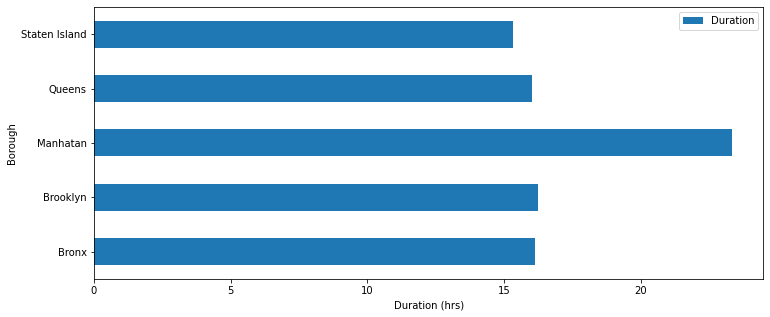

In [147]:
print(movies.groupby('Borough')['Duration'].mean().plot(kind='barh',legend='Reverse'))
plt.xlabel('Duration (hrs)')
plt.rcParams['figure.figsize']=[12,5]

### The given pie char makes a relation by means of the percentage of the different Boroughs in New York City, giving support to the previous graph, we observe that 'Manhatan' has a percentage of 26.79% of the total data according to 'Queens', 'Brooklyn' and 'Bronx' with percentages around 18.50%, and finally 'Staten Island' with a value of 17.62%.

AxesSubplot(0.355208,0.125;0.314583x0.755)


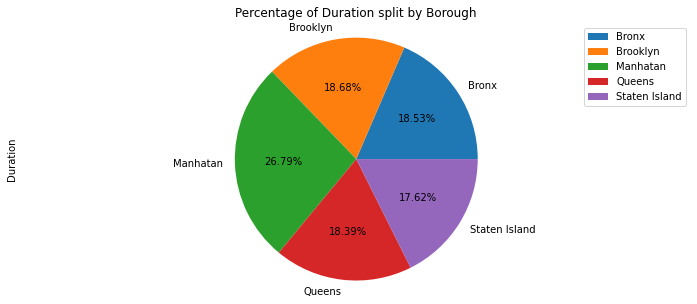

In [148]:
print(movies.groupby('Borough')['Duration'].mean().plot(kind='pie',legend='Paired',autopct='%.2f%%'))
plt.axis('equal')
plt.title('Percentage of Duration split by Borough')
plt.rcParams['figure.figsize']=[12,5]

### Next, a scatter plot is also shown stratifing values by Borough, it is evident that Manhatan has data dispersion between 1000 and 1500 hours with respect to the duration in turn that has 2 data from 2500 and 3500. Brooklyn and Queens present a dispersion of between 500 and 100 which is not relevant and Bronx and Staten Island do not present a relatively large dispersion.

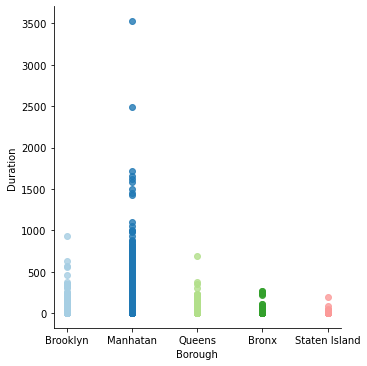

In [149]:
sns.lmplot(x='Borough',y='Duration',data=movies,fit_reg=False,hue='Borough',legend=False,palette='Paired')
plt.rcParams['figure.figsize']=[12,5]

### The next group of graphs shows us the relationship between Boroughs stratified histograms. It is clear that its distribution is tilted to the right side with some ups and downs. It should also be noted that the data concentration into each histogram is between 12 and 17 hours. The most relevant graphs are 'Brooklyn' and 'Manhatan' and those that contain the least amount of data and slightly flatter histograms are 'Bronx' and 'Staten Island'.

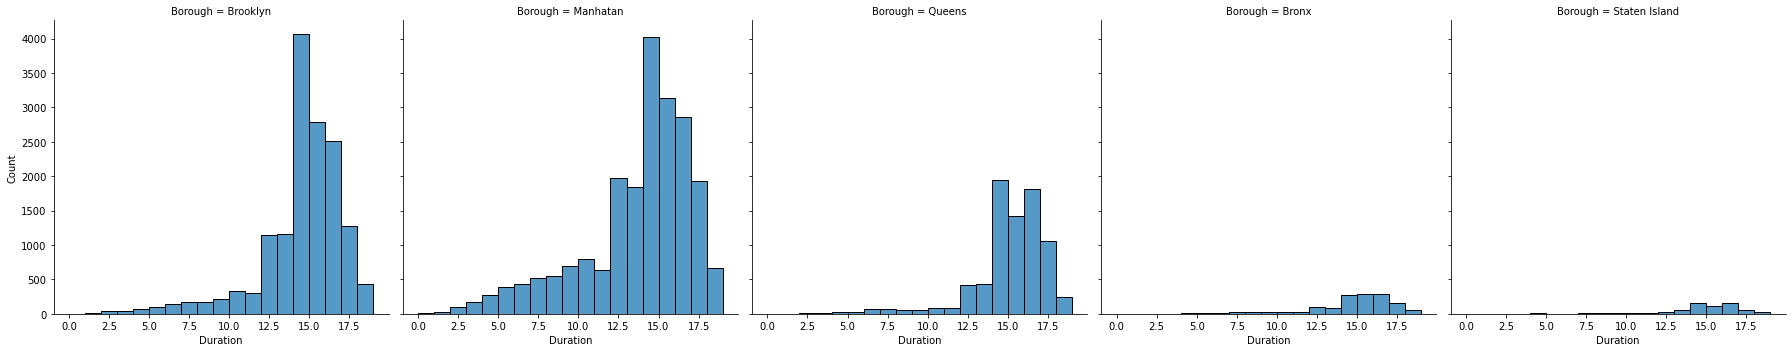

In [150]:
# Borough Mean Calculation
movies.groupby('Borough').Duration.mean()
sns.displot(movies,x='Duration',col='Borough', bins=range(0,20,1))

# Estadistical Summary split by Category

### The following study shows the statistic values related to each of the categories (types of filming) in New York City. As can clearly be seen, the highest average value of hours corresponds to "Theater" with a heat of 50.75 hours, followed by "television" and "Red Carpet / premiere" with values around 17 hours. The other categories do not have a significant variation and are found within a range of 15 to 16 hours and finally "Student" had the lowest average approval duration with 10.86 hours. The greatest variation with respect to the mean corresponds to "Teather" with 106.38 and the least was 8.823 which is from Still "Photography". We observe a value "NaN" since the category "Red Carpet / Premiere" only has one value which has no point of comparison within this category. The percentile values have a slight variation between 1 and 15 hours and the greatest variation continues to be "Teather" with values between 23.96 and 47.96 hours between 25% and 75% respectively.

In [151]:
# Grouping by category and calculation of statistical means
grouped_by_Category = pd.DataFrame(movies.groupby('Category').describe())
grouped_by_Category.drop(['EventID'], axis=1)

Duration                                               \
                       count       mean         std        min        25%   
Category                                                                    
Commercial            4391.0  15.049860    8.865860   1.000000  13.000000   
Documentary            211.0  15.586967   15.912817   1.500000  10.250000   
Film                  9072.0  15.344112   12.237644   1.000000  13.500000   
Music Video            166.0  15.400402    9.406132   1.500000  12.000000   
Red Carpet/Premiere      1.0  17.983333         NaN  17.983333  17.983333   
Still Photography     3294.0  13.995593    8.823107   0.500000  12.000000   
Student                341.0  10.860411   10.970898   2.000000   5.000000   
Television           28136.0  17.540210   34.604112   0.016667  14.000000   
Theater               4925.0  50.757543  106.387736   1.000000  23.966667   
WEB                   1813.0  16.007979   13.709585   1.000000  13.000000   

                                                        
                           50%        75%          max  
Category                                                
Commercial           15.000000  16.000000   252.000000  
Documentary          12.500000  15.416667   167.983333  
Film                 14.983333  16.000000   692.483333  
Music Video          14.000000  16.000000    74.000000  
Red Carpet/Premiere  17.983333  17.983333    17.983333  
Still Photography    13.000000  15.000000   205.000000  
Student               9.000000  13.000000    96.000000  
Television           15.000000  16.000000  2488.000000  
Theater              29.983333  47.966667  3528.000000  
WEB                  14.000000  16.000000   252.000000

### As you can see, "Teather" has a higher mean value than the other categories and the lowest is "Student". The other categories do not have a significant variation and their averages are around 15 and 20 hours.

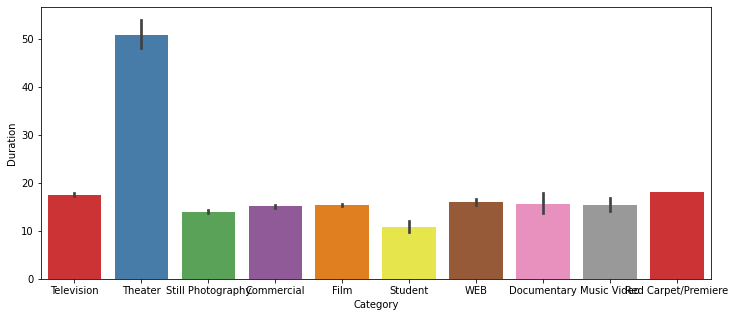

In [152]:
barplot = sns.barplot(x='Category',y='Duration',data=movies,palette='Set1')
barplot.set(xlabel='Category', ylabel='Duration')
plt.rcParams['figure.figsize']=[12,5]

### Giving support to the previous graph we observe that the category "Theater" has 26.92% of the data, while the other values have a variation of between 8.5% and 9.5%.

AxesSubplot(0.355208,0.125;0.314583x0.755)


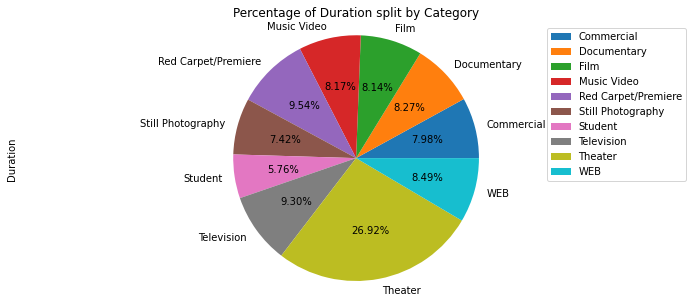

In [153]:
# Calculation of arithmetic averages stratified by 'Category'
print(movies.groupby('Category')['Duration'].mean().plot(kind='pie',legend='Paired',autopct='%.2f%%'))
plt.axis('equal')
plt.title('Percentage of Duration split by Category')
plt.rcParams['figure.figsize']=[12,5]

### From this scatter plot we observe that there are small variations within "Theater" between 1500 and 1800 hours, followed by "Television" with an apparently atypical data of 2500 hours. Finally we observe that "Film" has a scattered data found after 500 hours, the other categories do not have relevant scatters.

<AxesSubplot:xlabel='Category', ylabel='Duration'>

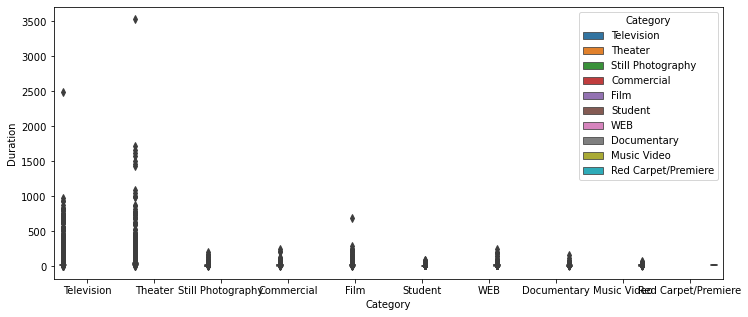

In [154]:
y_values = movies["Duration"].values
sns.boxplot(x="Category", y="Duration", hue="Category", data=movies, whis=[0.05, 0.95])

# Analysis of Category overall and broke down by Country

### The statistical study of the categories stratified by country is shown below. It should be noted that "United States of America" is the country that has used all the categories followed by "United Kingdom", the other countries have a smaller group in categories where "Television" and "Film" can be highlighted.

In [155]:
# In order to calculate only the statistical parameters on the variable 'Duration', the parameter 'Movies1' was created which allows filtering the table
#movies.drop(['EventID'], axis=1)
Category_by_country = pd.DataFrame(movies.groupby(['Country','Category']).describe())

#grouped_by_Borough_LT = pd.DataFrame(movies.groupby('Borough').describe())
#grouped_by_Borough_LT
Category_by_country.drop(['EventID'], axis=1)

Duration                         \
                                                count       mean         std   
Country                  Category                                              
Australia                Still Photography        1.0  10.000000         NaN   
                         Television               4.0  15.750000    0.500000   
Canada                   Commercial               4.0  15.250000    9.032349   
                         Film                     1.0  13.000000         NaN   
                         Television               4.0  13.125000    2.657536   
France                   Film                     1.0  13.000000         NaN   
                         Student                  6.0  19.500000   19.357169   
Germany                  Television               1.0  26.500000         NaN   
Ireland                  Film                     2.0  12.250000    1.767767   
Japan                    Television               8.0   9.000000    2.070197   
Netherlands              Film                     3.0  13.000000    3.000000   
Panama                   Film                     7.0  13.566667    0.787342   
United Kingdom           Commercial               9.0  11.666667    4.330127   
                         Documentary              1.0   5.000000         NaN   
                         Still Photography        3.0  11.666667    3.511885   
                         WEB                      3.0  16.000000    1.732051   
United States of America Commercial            4378.0  15.056632    8.872605   
                         Documentary            210.0  15.637381   15.933941   
                         Film                  9058.0  15.347463   12.246676   
                         Music Video            166.0  15.400402    9.406132   
                         Red Carpet/Premiere      1.0  17.983333         NaN   
                         Still Photography     3290.0  13.998931    8.827490   
                         Student                335.0  10.705672   10.749353   
                         Television           28119.0  17.543204   34.614157   
                         Theater               4925.0  50.757543  106.387736   
                         WEB                   1810.0  16.007993   13.720827   

                                                                               \
                                                    min        25%        50%   
Country                  Category                                               
Australia                Still Photography    10.000000  10.000000  10.000000   
                         Television           15.000000  15.750000  16.000000   
Canada                   Commercial            5.000000  11.750000  14.500000   
                         Film                 13.000000  13.000000  13.000000   
                         Television           10.000000  11.500000  13.250000   
France                   Film                 13.000000  13.000000  13.000000   
                         Student              11.000000  11.250000  12.000000   
Germany                  Television           26.500000  26.500000  26.500000   
Ireland                  Film                 11.000000  11.625000  12.250000   
Japan                    Television            6.000000   8.250000   9.500000   
Netherlands              Film                 10.000000  11.500000  13.000000   
Panama                   Film                 12.000000  13.483333  14.000000   
United Kingdom           Commercial            5.000000  10.000000  12.000000   
                         Documentary           5.000000   5.000000   5.000000   
                         Still Photography     8.000000  10.000000  12.000000   
                         WEB                  14.000000  15.500000  17.000000   
United States of America Commercial            1.000000  13.000000  15.000000   
                         Documentary           1.500000  10.620833  12.741667   
                       

### The following graph gives a clear understanding of the statistics calculated above where it is highlighted that "United States of America" is the country that has used all the categories in the film shootings. As we can see, the color is a way of validating the average in hours used by each of the categories in each country, this is how we observe that "Theater has had an average of between 40 and 50 average hours of approval to be able to film followed by" Red Carpet / premier "with a value between 20 and 30 and the lowest of all was" Student "with a value below 10 hours.

<AxesSubplot:xlabel='Country', ylabel='Category'>

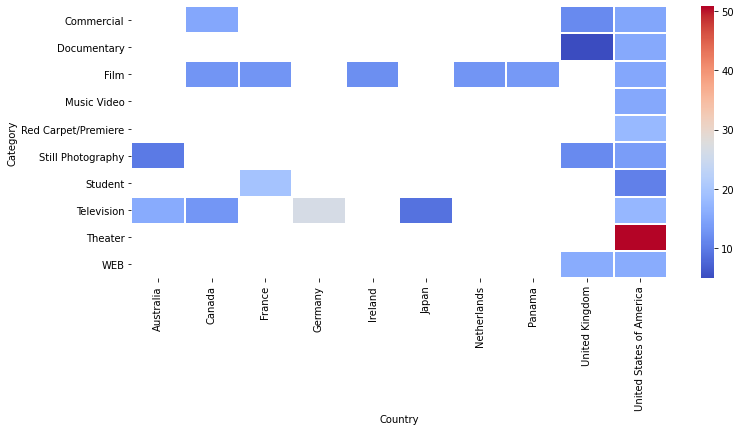

In [156]:
movies.pivot_table(values='Duration',index='Category',columns='Country').round(2)
pvtips = movies.pivot_table(values='Duration',index='Category',columns='Country')
sns.heatmap(pvtips,cmap='coolwarm',linecolor='white',linewidths=1)

### The following graph only supports and verifies the percentage of data that each of the countries has by category, there are no relevant variations to highlight.

AxesSubplot(0.355208,0.125;0.314583x0.755)


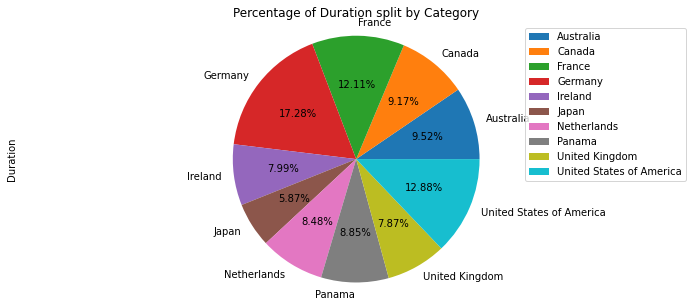

In [157]:
print(movies.groupby('Country')['Duration'].mean().plot(kind='pie',legend='Paired',autopct='%.2f%%'))
plt.axis('equal')
plt.title('Percentage of Duration split by Category')
plt.rcParams['figure.figsize']=[12,5]

# Estadistical summary split by Category and Police Precincts

### Next the pertinent coding for the handling of the data is presented in order to extract the police precincts of each one of the cells by category.

In [158]:
# Get 'Counter' from the 'Collections' release
from collections import Counter
# Convert variable 'PolicePrecinct (s)' to String
movies['PolicePrecinct(s)'] = movies['PolicePrecinct(s)'].astype(str)
# Group all 'Police Precincts' by category in a single cell separated by commas
count_PolicePrecinct = movies.groupby('Category')['PolicePrecinct(s)'].apply(','.join).reset_index()
# Count the 'Police Precincts' grouped within the same category
count_PolicePrecinct['PolicePrecinct(s)'] = count_PolicePrecinct['PolicePrecinct(s)'].apply(lambda x: Counter(x.split(",")))
# Add 'count_PolicePrecinct' column from 'count_PolicePrecinct' to a new column 'count_ex'
count_ex = pd.concat([count_PolicePrecinct,count_PolicePrecinct['PolicePrecinct(s)'].apply(pd.Series)], axis=1)
# Delete old 'Police Precincts)' column
count_ex.drop(columns='PolicePrecinct(s)',inplace=True)
# Stack new column 'Police Precinct (s)' inside a new variable 'stacked'
stacked = count_ex.stack()
# Replace the old index with the already determined new index
count_final_PolicePrecinct = stacked.reset_index(level=[0,1])
# Create columns
count_final_PolicePrecinct.columns =['Category','PolicePrecinct(s)','Count']
# Replace 'Category' variable by 'Category' variable from 'count_PolicePresinct'
count_final_PolicePrecinct['Category']=count_final_PolicePrecinct['Category'].replace(count_PolicePrecinct['Category'])
# Establish a difference between 'PolicePrecinct(s) and 'Category' variables
count_final_PolicePrecinct = count_final_PolicePrecinct[count_final_PolicePrecinct['PolicePrecinct(s)'] != 'Category']

count_final_PolicePrecinct['Count'].dtype
# Chance variable to int type
count_final_PolicePrecinct['Count']=count_final_PolicePrecinct['Count'].astype('int')
# Chance variable to str type
count_final_PolicePrecinct['PolicePrecinct(s)']=count_final_PolicePrecinct['PolicePrecinct(s)'].astype('str')
count_final_PolicePrecinct['Category']=count_final_PolicePrecinct['Category'].astype('str')
# Print 'count_final'
count_final_PolicePrecinct

,Category,PolicePrecinct(s),Count
1,Commercial,90,143
2,Commercial,14,297
3,Commercial,18,210
4,Commercial,70,146
5,Commercial,34,7
...,...,...,...
976,WEB,67,5
977,WEB,103,2
978,WEB,113,4
979,WEB,123,1


### The following graph shows us Policeprecincts grouped by category according to their repetition. It is clear that 'Television' is the category with the most PolicePrecincts and the highest number of repetitions, later the individual graphic of 'Television' will be shown.

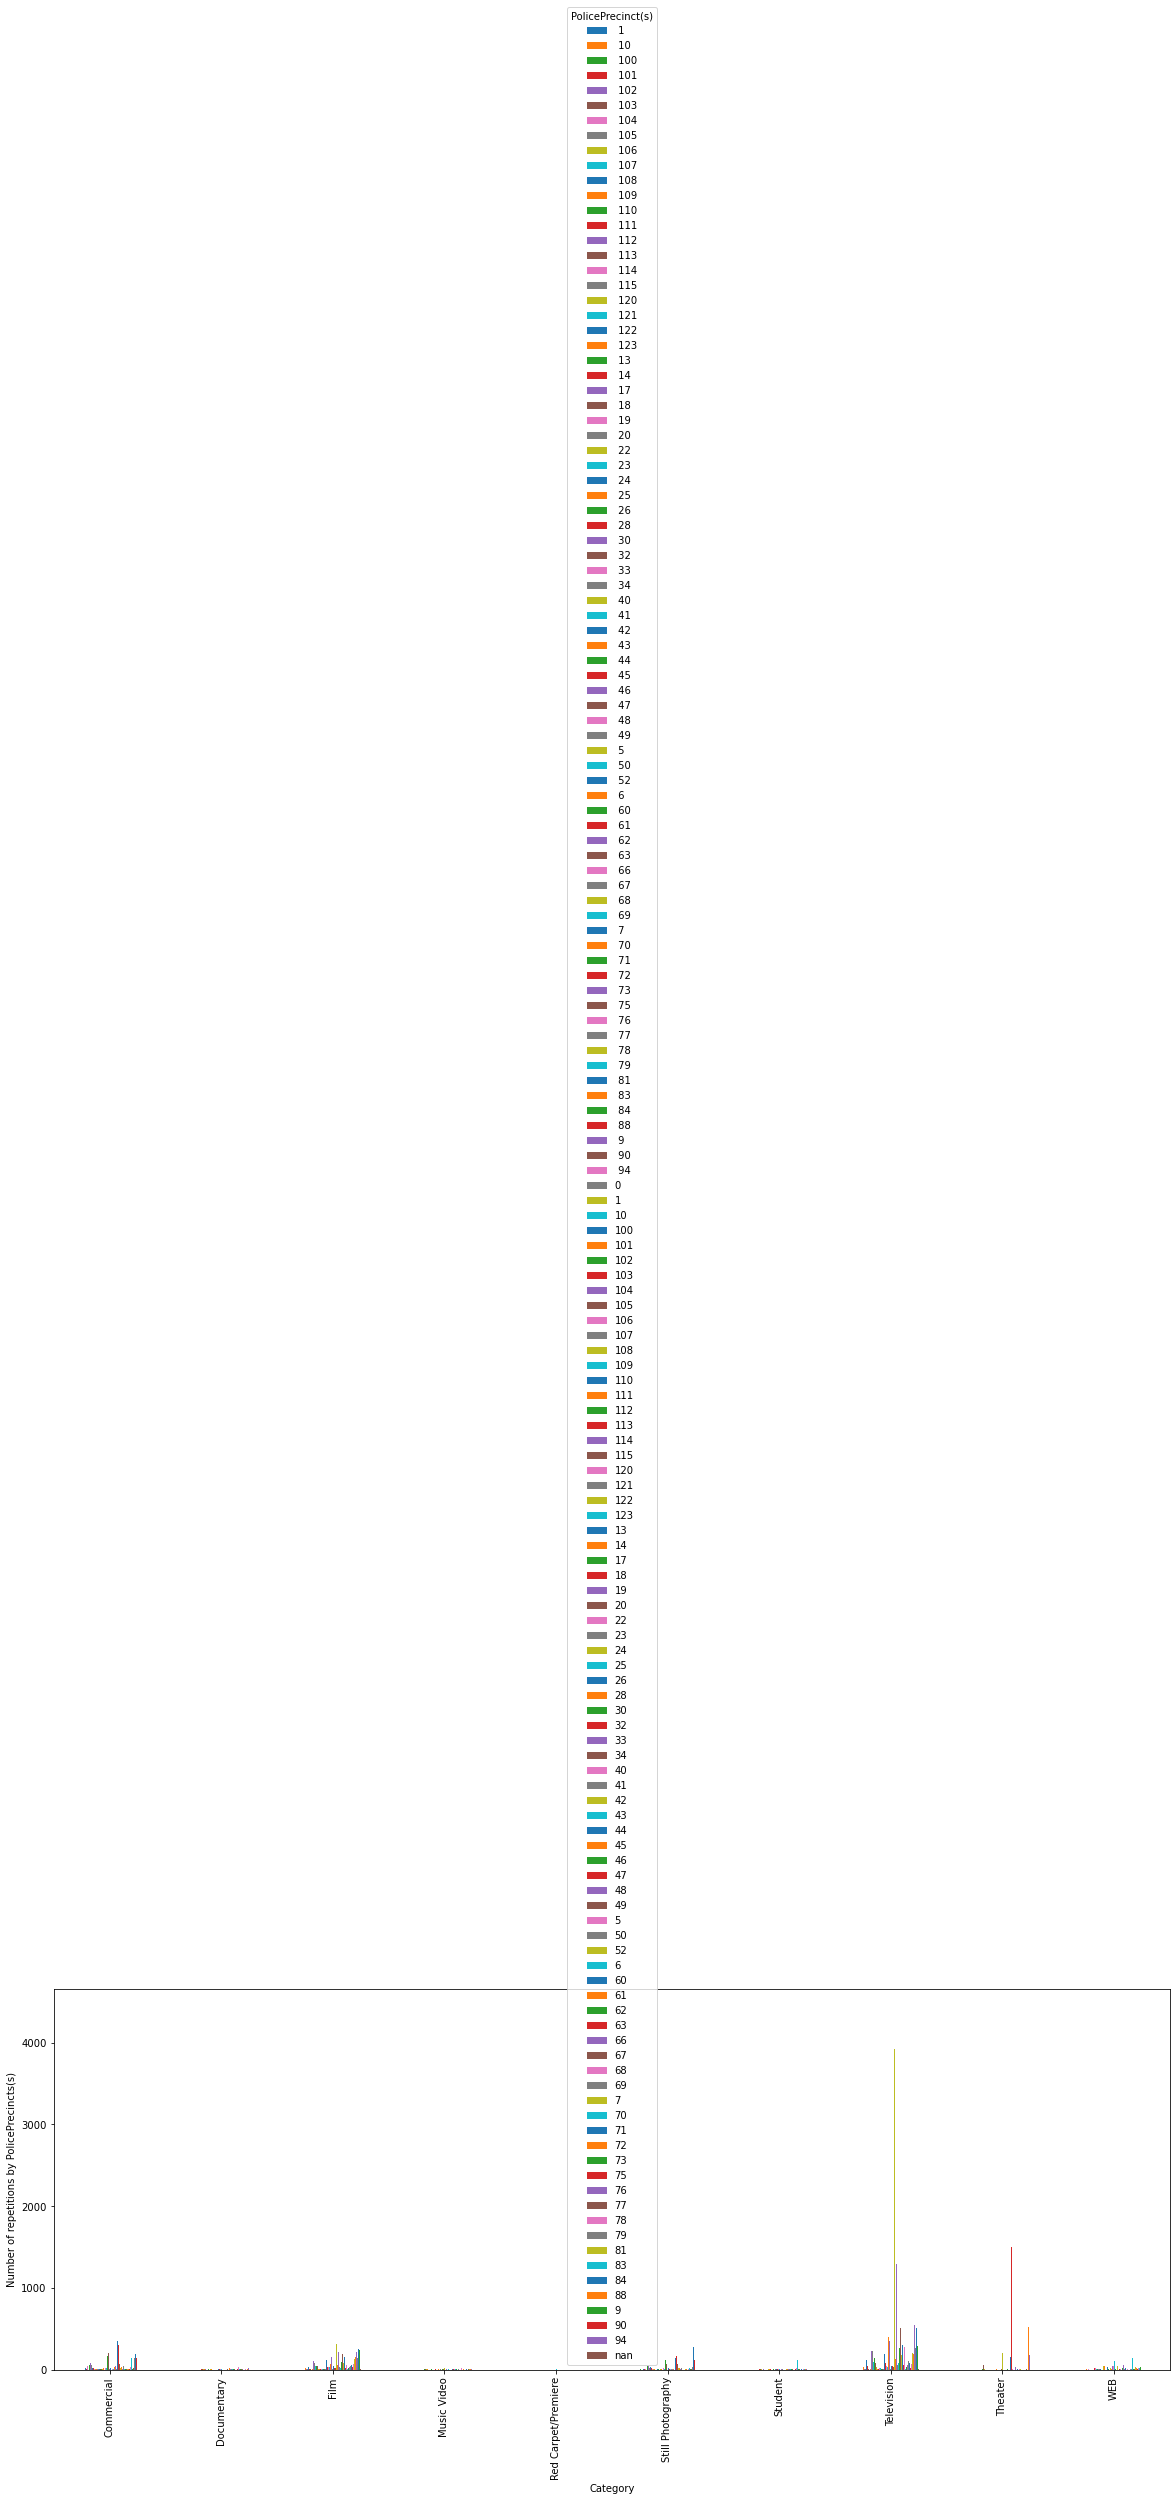

In [159]:
pd.to_numeric(count_final_PolicePrecinct['Count'], errors='coerce')
df_pivot = pd.pivot_table(count_final_PolicePrecinct, values="Count", index="Category", columns="PolicePrecinct(s)", aggfunc=np.sum)

#Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(20, 7)
# Change the axes labels
ax.set_xlabel("Category")
ax.set_ylabel('Number of repetitions by PolicePrecincts(s)')

# Use this to show the plot in a new window
plt.show()

### The following table and graph show us a little more stratified the values ​​by PolicePrecincts in the category 'Television', however it is not yet clear which of them is the most relevant, therefore it was chosen to do a small cleaning of the data so as not to distort the results.

In [160]:
# This variable is created only to stratify the 'Television' data
data_stratified_by_television = count_final_PolicePrecinct[(count_final_PolicePrecinct['Category']=='Television')]
data_stratified_by_television

,Category,PolicePrecinct(s),Count
660,Television,90,719
661,Television,14,1331
662,Television,18,657
663,Television,70,238
664,Television,34,86
...,...,...,...
808,Television,113,10
809,Television,123,7
810,Television,106,11
811,Television,69,2


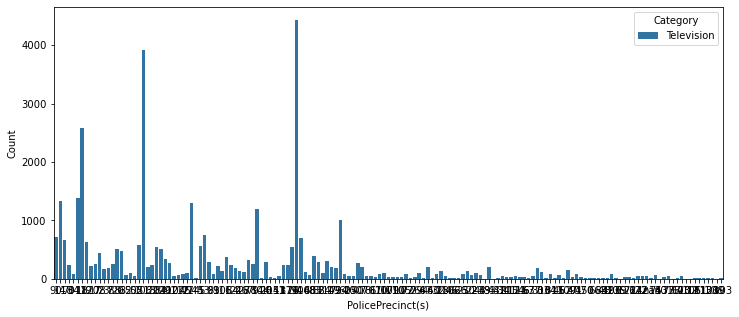

In [161]:
sns.barplot(x = "PolicePrecinct(s)", y = "Count", hue = "Category", ci = None, data = data_stratified_by_television)
plt.show()

### The following graph was made with filtered data according to PolicePrecincts with a repetition greater than 200 times for each one of them. We observed that PolicePrecinct number 94 had a value around 4000 which highlights it as the most used in the category 'Television'.

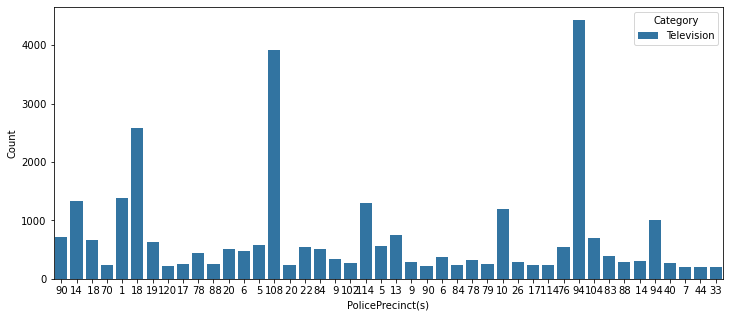

In [162]:
answer1 = data_stratified_by_television[(data_stratified_by_television['Count'] >= 200)]
answer1
sns.barplot(x = "PolicePrecinct(s)", y = "Count", hue = "Category", ci = None, data = answer1)
plt.show()

# Stadistical summary LEAD TIME

### The following statistical study was made from the variable 'LeadTime' which is the duration of the filming of the film, this variable unlike 'Duration' which is the time in which the approval is delayed, is in days because the values in hours are too large to make a proper statistical study. As can clearly be seen, the average recording time was 5.40 days with a dispersion of 7.40 from the mean. The movie with the highest lead time had a value of 239.76 days and the lowest had a negative value which means that the movie started recording on the same day and their difference can be in hours. The distribution of the percentiles is between 2.06 and 5.70 for 25% and 75% respectively.

In [163]:
movies['EnteredOn'] = pd.to_datetime(movies['EnteredOn'],errors='raise')
movies['LeadTime'] = (movies.StartDateTime - movies.EnteredOn) / pd.Timedelta('1 day')

# Compute the interquartile range
outlier_value_Leadtime = np.where(movies['LeadTime']==32)
q1 = movies['LeadTime'].quantile(q=0.25)
q3 = movies['LeadTime'].quantile(q=0.75)
IQR2 = q3 - q1

print(movies.LeadTime.describe().round(2),'\n',IQR2,'\n',outlier_value_Leadtime)

count    52350.00
mean         5.40
std          7.40
min         -1.14
25%          2.06
50%          3.77
75%          5.70
max        239.76
Name: LeadTime, dtype: float64 
 3.6333912037037037 
 (array([], dtype=int64),)


### The graph below shows the distribution of the variable 'LeadTime' by means of a Histogram. It is clear that the graph shows a slight inclination to the left side and the data concentration is between 0 and 10 hours. Subsequent data groups are not relevant because the number of them is low.

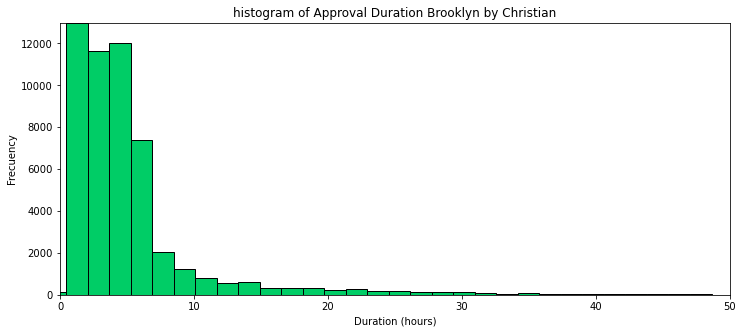

In [164]:
# Histogram of 'LeadTime' variable
n, bins, patches = plt.hist(movies['LeadTime'],bins=150,facecolor='#00CD66',edgecolor='black')
max_y = max(n)
plt.axis([0,50,0,max_y])
plt.title("histogram of Approval Duration Brooklyn by Christian")
plt.xlabel("Duration (hours)")
plt.ylabel("Frecuency")
plt.rcParams['figure.figsize']=[12,5]

### The graph shows a combination between boxplot and histogram. As we can clearly see, there is a cycle behavior given the ups and downs between values 0 to 8. Evidently, we can say that the graph has not a normal behavior so that will be impossible to do some estimations about correlation between 2 or more variables. The boxplot has a concentration of data between 2 to around 4. The 25% of data is from 0 to 2 hours followed by 50% of the data located around 3 hours and the 75% is finalized in 4.5 hours.

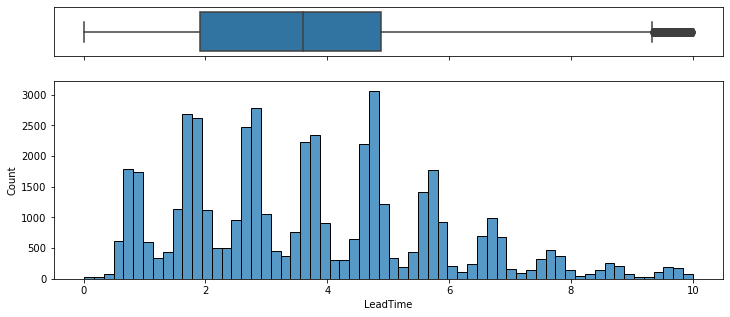

In [165]:
import warnings
warnings.filterwarnings('ignore')
LeadTime_between_0to10 = movies[(movies['LeadTime'] > 0) & (movies['LeadTime'] <= 10)]

f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.2,.8)})
sns.boxplot(LeadTime_between_0to10['LeadTime'], ax = ax_box)
sns.histplot(data = LeadTime_between_0to10, x = 'LeadTime', ax = ax_hist)
ax_box.set(xlabel='',yticks=[])
plt.show()

### The following graph shows that there is a correlation between the two variables, however some points are so dispersed that they can cut the correlation line. Initially, some scattered points are observed between 40 and 100 hours either by the variable 'Duration' or the variable 'LeadTime', it is therefore necessary to clean the data to verify the graph again. Additionally, the correlation line starts from a value of 4 hours and is an assistent line, it would be possible to establish a hypothesis which deduces if "the longer it lasts, there will be a longer leadtime"

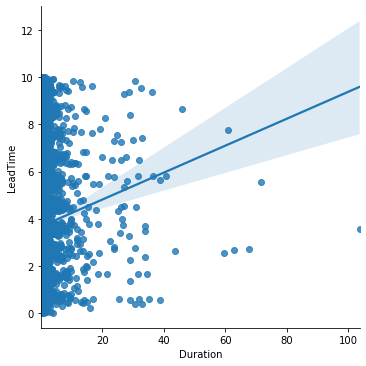

In [166]:
import warnings
warnings.filterwarnings('ignore')

LeadTime_between_0to10['Duration'] = (movies.EndDateTime - movies.StartDateTime) / pd.Timedelta('1 day')

sns.lmplot(x='Duration',y='LeadTime',data=LeadTime_between_0to10)

### The following statistical study focuses on the variable 'LeatTime' stratified by the variable 'Borough'. As can be seen, Manhatan has an average value of 6.46 days followed by Bronx and Brooklyn with 4.02 and 4.58 respectively. The Boroughs with the lowest average value were Queens and Staten Island with values around 3.6 days. We observe that the greatest dispersion of the data with respect to the mean corresponds to Manhatan with a value of 9.58 while the other Boroughs have values that oscillate between 2.7 and 4.2. The percentiles have a variation of 1.5 days and 2 days in the case of 25% 3 in the case of 50% and there is a variation of between 4 and 6 days corresponding to 75%. The Bronx is the only Borough that has a minimum positive value of 0.1391 days, while the other Boroughs have negative values that vary between 0.3 and 1.14 days.

In [167]:
grouped_by_Borough_LT = pd.DataFrame(movies.groupby('Borough').describe())
grouped_by_Borough_LT
grouped_by_Borough_LT.drop(['EventID','Duration'], axis=1)

LeadTime                                                    \
                 count      mean       std       min       25%       50%   
Borough                                                                    
Bronx           1473.0  4.021828  2.830075  0.139155  1.930694  3.701169   
Brooklyn       15887.0  4.586107  4.256432 -1.143252  2.108495  3.748530   
Manhatan       26226.0  6.466743  9.582640 -0.742604  2.329349  3.883443   
Queens          8104.0  3.964490  3.435893 -0.335683  1.849248  3.573356   
Staten Island    660.0  3.602939  2.772011 -0.312836  1.838950  2.945405   

                                     
                    75%         max  
Borough                              
Bronx          5.123889   25.480081  
Brooklyn       5.599838   58.659676  
Manhatan       6.461010  239.757778  
Queens         4.845747   63.793657  
Staten Island  4.693898   31.661204

### The following graph shows us the percentage of participation of each of the Boroughs. It is clear that Manhatan has the highest participation with 28.56% followed by Brooklyn with 20.25%. The other Boroughs have percentage variations between 15% and 17%.

AxesSubplot(0.355208,0.125;0.314583x0.755)


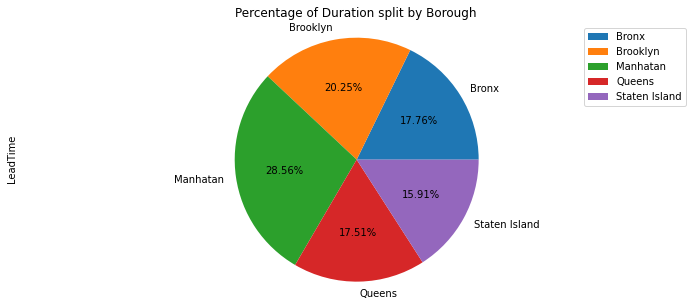

In [168]:
print(movies.groupby('Borough')['LeadTime'].mean().plot(kind='pie',legend='Paired', autopct='%.2f%%'))
plt.axis('equal')
plt.title('Percentage of Duration split by Borough')
plt.rcParams['figure.figsize']=[12,5]

### The following graph shows the averages by borough to better understand the trends. As previously said, Manhatan have the highest Lead Time while the other Boroughs do not present a significant variation with each other, Staten Island has the shortest time with a value of around 3 days.

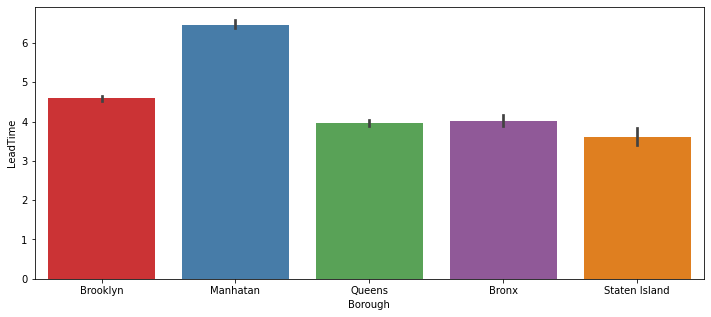

In [169]:
barplot = sns.barplot(x='Borough',y='LeadTime',data=movies,palette='Set1')
barplot.set(xlabel='Borough', ylabel='LeadTime')
plt.rcParams['figure.figsize']=[12,5]

# Conclusions

### Given the amount of data and that some are atypical, a small cleaning had to be carried out to perform the histogram in this case of the variable 'Duration'. The cleaning was done with values between 10 and 20 because there was the highest concentration of data.

### In the statistical study of 'Duration' stratified by 'Borough', it is observed that 'Manhatan' has the highest value of duration on average and its dispersion is quite high. There is no evidence of high variations among the other 'Borough'

### The histogram plots of 'Duration' stratified by 'Borough' seem to have anomalous behaviors, that is, there would not be a correlation between one and the other. It is necessary to carry out statistical tests to validate this hypothesis

### In the statistical study of 'Duration' stratified by countries, it is possible to identify the United States as the country that has the longest duration in its approval. It is also identified that the Category 'Theater' is the one that has the longest duration in approval.

### In the statistical study of 'Category' stratified by 'PolicePrecinct (s)' it is identified that 'Television' has the highest use of the PolicePrecincts in total and that the PolicePrecint 94 is the most used by this category.

### In the statistical study of the variable 'LeadTime' stratified by 'Borough' we observe that Manhatan has the highest leadtime compared to the other Boroughs.